# Hoja de trabajo #2
## Edgar Sabán - 19012631

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Funciones de apoyo
def write_and_show(strImg, arrImg):
    cv2.imwrite(strImg, arrImg)
    show(strImg)
    
def show(strImg):
    imgTemp = cv2.imread(strImg)
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

## Problema #1

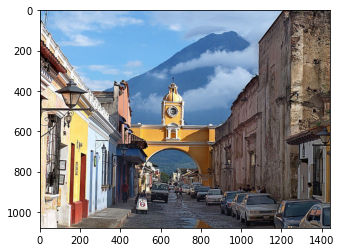

In [75]:
# Imagen original
strImg = "arco.jpeg"
show(strImg)

In [23]:
def binarizar(strImg):
    img = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)

    alto = img.shape[0]
    ancho =  img.shape[1]

    binarizada = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            pixelB = img[i,j]
            if pixelB < 127:
                pixelB=0
            else:
                pixelB=255
            binarizada[i,j] = pixelB
    return binarizada

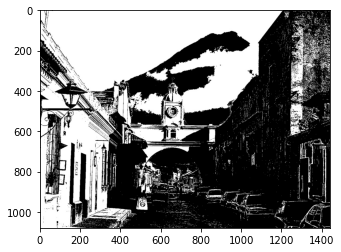

In [77]:
b = binarizar(strImg)
write_and_show("out/binarizada.jpg",b)

# Problema 2

In [78]:
def operaciones(strImg1, strImg2):
    img1 = cv2.imread(strImg1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

    img2 = cv2.imread(strImg2)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    img1b = binarizar(strImg1)
    img2b = binarizar(strImg2)

    alto = img1.shape[0]
    ancho =  img1.shape[1]

    suma = np.zeros((alto, ancho, 3))
    resta = np.zeros((alto, ancho, 3))
    imgAND = np.zeros((alto, ancho, 1))
    imgOR = np.zeros((alto, ancho, 1))
    imgXOR = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            suma[i,j] = img1[i,j] + img2[i,j]
            resta[i,j] = img1[i,j] - img2[i,j]
        
            # Booleanas
            if img1b[i,j]==255:
                img1b[i,j] = 1
            if img2b[i,j]==255:
                img2b[i,j] = 1
            
            rAND = img1b[i,j] and img2b[i,j]
            rOR = img1b[i,j] or img2b[i,j]
            rXOR = img1b[i,j] != img2b[i,j]
        
            if rAND==1:
                imgAND[i,j] = 255
            else:
                imgAND[i,j] = 0
        
            if rOR==1:
                imgOR[i,j] = 255
            else:
                imgOR[i,j] = 0
            
            if rXOR==1:
                imgXOR[i,j] = 255
            else:
                imgXOR[i,j] = 0
                
    return suma, resta, imgAND, imgOR, imgXOR

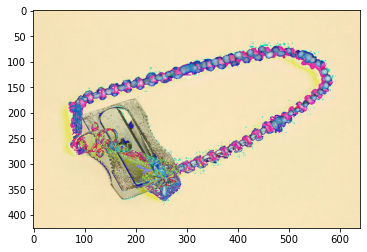

In [79]:
strImg1 = "add1.jpeg"
strImg2 = "add2.jpeg"

s,r,a,o,x = operaciones(strImg1, strImg2)

write_and_show("out/suma.jpg",s)

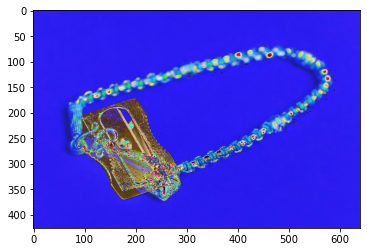

In [80]:
write_and_show("out/resta.jpg",r)

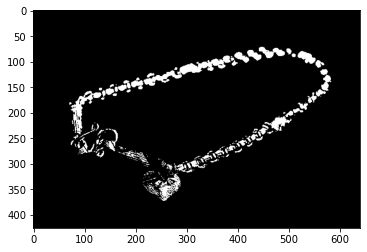

In [81]:
write_and_show("out/and.jpg", a)

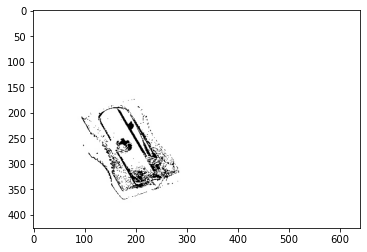

In [82]:
write_and_show("out/or.jpg",o)

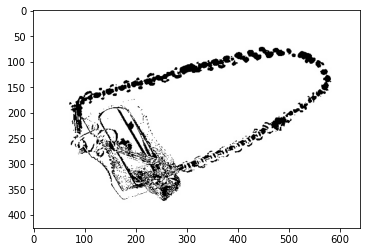

In [83]:
write_and_show("out/xor.jpg",x)

# Problema 3